In [56]:
from lifelines import *
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

In [57]:
# get list of all csv file
DIR_NAME = "rod_pump"
file_names = [f for f in listdir(DIR_NAME) if isfile(join(DIR_NAME, f))]

In [58]:
# create a list of dataframes for each csv file in ./rod_pump
# then concat to create master dataframe
df_list = []
for file in file_names:
    df = pd.read_csv(f'rod_pump/{file}')
    # make sure name of csv is included
    df['Name'] = file.replace('.csv', '')
    df_list.append(df)

df = pd.concat(df_list)

In [59]:
df['T'] = df['time (hours)']
df['E'] = 0
df.ix[df["Casing Pressure (psi)"] > 0, ['E']] = 1

/home/yuntong/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
df.shape

(4498180, 11)

In [61]:
T = df['T']
E = df['E']

kmf = KaplanMeierFitter()
kmf.fit(T, E)

<lifelines.KaplanMeierFitter: fitted with 4.49818e+06 total observations, 1508 right-censored observations>

In [62]:
kmf.survival_function_
kmf.cumulative_density_
kmf.median_

/home/yuntong/.local/lib/python3.6/site-packages/lifelines/fitters/kaplan_meier_fitter.py:287: FutureWarning: Please use `median_survival_time_` property instead. Future property `median_` will be removed.
  FutureWarning,


21645.0

/home/yuntong/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


(1.0, 69977.0)

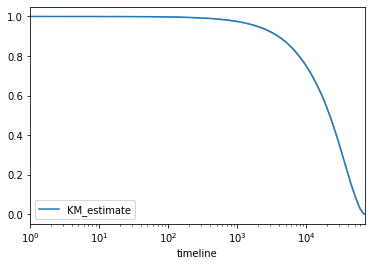

In [66]:
plt = kmf.plot()
ax = plt.axes
p = plt.get_figure()
# get axe for plot and change to log scale
ax.set_xscale('log')
ax.set_xlim()
